# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
print(X.shape, y.shape)
print(type(X), type(y))

(70000, 784) (70000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

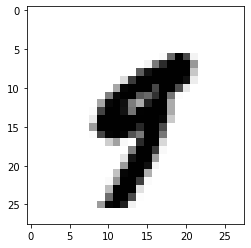

In [5]:
cmap = mpl.cm.binary
plt.imshow(X[36000].reshape(28,28), cmap=cmap, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
y[36000]

'9'

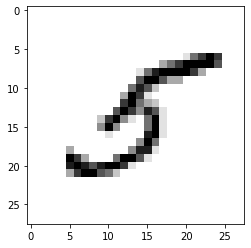

In [7]:
# we will repeat this for the index 35 as we are looking for a 5 later in the lab
plt.imshow(X[35].reshape(28,28), cmap=cmap, interpolation="nearest")

In [8]:
y[35]

'5'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [9]:
X_train, X_test , y_train, y_test = X[:60000], X[60000:] , y[:60000], y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example "5". Do this by defining a new y training and y testing sets for just the number 5

In [10]:
# we are looking to make a NEW ARRAY that indicated weather the original y is 5 or not [0,1]
# np.where to create new array first
# as X is a str, we will also make the new array a str
y5 = np.where(y == "5", 1, 0)

In [11]:
# split data as above
y5_train, y5_test = y5[:60000], y5[60000:]

In [12]:
y5

array([1, 0, 0, ..., 0, 1, 0])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()
model.fit(X_train, y5_train)

C:\Users\fabia hnt\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [15]:
y5_pred = model.predict(X)
print(y5_pred[36000])
# checked value ius correct, the row has a 9 in it, not a 5

0


In [16]:
# check for a known 5, should give us 1
print(y5_pred[35])

1


In [17]:
# we did a quick test for the X_test 45 as we knew this would be a 5
y5_pred = model.predict(X_test)
print(y5_pred[45])

1


In [18]:
print(y5_pred.shape, y5_test.shape)

(10000,) (10000,)


### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [19]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [20]:
never_5_clf.fit(X_train, y5_train)

In [21]:
#check if the model is different form the LogRegression with the SAME values we did above
never_5_pred = never_5_clf.predict(X)
print(never_5_pred[36000])
print(never_5_pred[35])

[False]
[False]


In [22]:
# now that we checked it, we change back to X_test
never_5_pred = never_5_clf.predict(X_test)

In [23]:
print(never_5_pred.shape, y5_test.shape)

(10000, 1) (10000,)


In [24]:
# we see that the sahpes are not equal, we have to create an array of the array selecting only ONE column or FLATTEn
never_5_pred = never_5_pred.flatten()
never_5_pred.shape

(10000,)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [25]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

In [26]:
# examination of LogisticRegression
# BE SURE TO HAVE AN INTIGER [0,1] for the replacement NOT STRING
# if you have string do a pos_label ( we changed out np.-where)

print ('Accuracy:', accuracy_score(y5_test, y5_pred))
print ('F1 score:', f1_score(y5_test, y5_pred))
print ('Recall:', recall_score(y5_test, y5_pred))
print ('Precision:', precision_score(y5_test, y5_pred))
print ('\n confussion matrix:\n',confusion_matrix(y5_test, y5_pred))

Accuracy: 0.9772
F1 score: 0.867595818815331
Recall: 0.8374439461883408
Precision: 0.9

 confussion matrix:
 [[9025   83]
 [ 145  747]]


In [27]:
# examination of never_5
y5 = np.where(y == "5", 1, 0)
print ('Accuracy:', accuracy_score(y5_test, never_5_pred))
print ('F1 score:', f1_score(y5_test, never_5_pred))
print ('Recall:', recall_score(y5_test, never_5_pred))
print ('Precision:', precision_score(y5_test, never_5_pred))
print ('\n confussion matrix:\n',confusion_matrix(y5_test, never_5_pred))

Accuracy: 0.9108
F1 score: 0.0
Recall: 0.0
Precision: 0.0

 confussion matrix:
 [[9108    0]
 [ 892    0]]


C:\Users\fabia hnt\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fabia hnt\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

##### log function

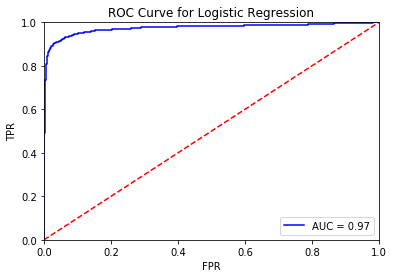

In [28]:
# using the decision_function
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve

y_score = model.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y5_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

# Plotting the worse case line, dotted line, that is where the outcome is decided randomly 
plt.plot([0, 1], [0, 1],'r--')

# Setting aesthetics of the plot 
plt.legend(loc = 'lower right')
plt.title('ROC Curve for Logistic Regression')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()




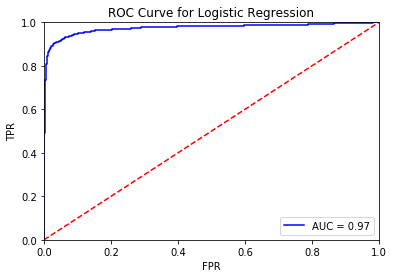

In [29]:
# version 2
# Importing metrics to plot the ROC_AUC curve 
import sklearn.metrics as metrics

# Calculating the ROC_Curve for the Logistic Regression 

# Calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y5_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Creating the ROC_CURVE for Logistic Regression 
import matplotlib.pyplot as plt
# Plotting the ROC_AUC curve 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

# Plotting the worse case line, dotted line, that is where the outcome is decided randomly 
plt.plot([0, 1], [0, 1],'r--')

# Setting aesthetics of the plot 
plt.legend(loc = 'lower right')
plt.title('ROC Curve for Logistic Regression')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

##### never 5 function

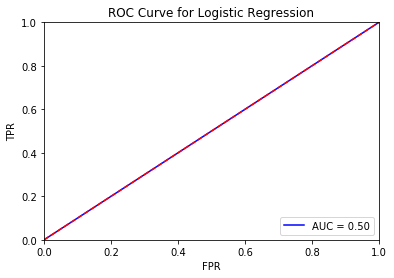

In [30]:
fpr, tpr, thresholds = roc_curve(y5_test, never_5_pred)
# we are looking for the performance of the y_5 test and the never 5 prediciton therefore those are our variables
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

# Plotting the worse case line, dotted line, that is where the outcome is decided randomly 
plt.plot([0, 1], [0, 1],'r--')

# Setting aesthetics of the plot 
plt.legend(loc = 'lower right')
plt.title('ROC Curve for Logistic Regression')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### Now find the roc_auc_score for each. 

In [ ]:
from sklearn.metrics import roc_auc_score

# for log
print({roc_auc_score(y5_test, y5_pred)})

# for never 5
print({roc_auc_score(y5_test, y_never_5_pred)})

### What does this metric tell you? Which classifier works better with this metric in mind?

# roc score is not working... ill see if i cn fix this later